<a href="https://colab.research.google.com/github/lukasz86s/Machine_learning/blob/main/keras_handwritten_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:

import tensorflow as tf
tf.__version__


'2.6.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

np.set_printoptions(precision=12, suppress=True, linewidth=120)

raw_data =  datasets.mnist.load_data()


#show example data

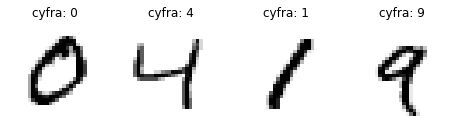

In [ ]:
x_train, x_test = raw_data[0][0], raw_data[1][0]
y_train, y_test = raw_data[0][1], raw_data[1][1]

plt.figure(figsize=(10, 10))
for i in range(1, 5):
  plt.subplot(1, 5, i)
  plt.imshow(x_train[i], cmap='gray_r')
  plt.axis('off')
  plt.title(f"cyfra: {y_train[i]}")
plt.show()

#build model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
x_train = x_train/255
x_test = x_test/255

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#fit model

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.9170
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1532 - accuracy: 0.9553
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1185 - accuracy: 0.9657
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0995 - accuracy: 0.9711
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9754
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9779
Epoch 7/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0696 - accuracy: 0.9805
Epoch 8/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9820
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9835


#show metrics

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1102 - accuracy: 0.9704


[0.11024937778711319, 0.9703999757766724]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.295457,0.916967
1,0.153216,0.955350
2,0.118535,0.965733
3,0.099524,0.971067
4,0.086116,0.975367
5,0.076944,0.977933
6,0.069616,0.980533
7,0.064189,0.982000
8,0.059802,0.983467


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics.loss, name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics.accuracy, name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

#predict

In [ ]:
pred = model.predict(x_test)
pred

array([[0.            , 0.            , 0.000000511304, ..., 0.9999982     , 0.000000000212, 0.000000043018],
       [0.            , 0.000000000678, 1.            , ..., 0.            , 0.00000000021 , 0.            ],
       [0.000000001668, 0.99886453    , 0.00021011516 , ..., 0.00059786154 , 0.0002823453  , 0.000012481978],
       ...,
       [0.            , 0.            , 0.000000000021, ..., 0.000015338017, 0.000090471134, 0.0012163701  ],
       [0.            , 0.            , 0.            , ..., 0.000000000002, 0.00000001409 , 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [ ]:
y_pred = pred.argmax(axis=-1)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
y_test = pd.DataFrame(y_test, columns=['y_test'])
y_data = pd.concat([y_pred, y_test], axis=1)


In [ ]:
y_data
diference = y_data[y_data.y_pred != y_data.y_test].index
y_data.iloc[diference[5]][1]

4

#show wrong predict

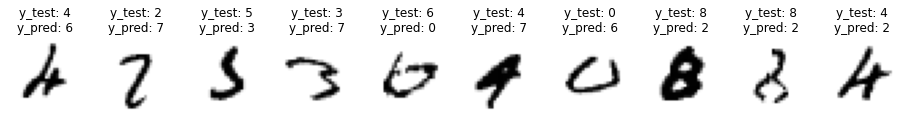

In [ ]:
plt.figure(figsize=(16, 10))
for i, index in enumerate(diference[:10]):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_test[index], cmap='gray_r')
  plt.axis('off')
  plt.title(f"y_test: {y_test.iloc[index][0]}\ny_pred: {y_pred.iloc[index][0]}")
plt.show() 